# Processing the Image1 Processing

I downloaded and preprocessing the information using a plugin on QGIS (Basically, I downloaded the jp2 sentinel data and preprocesss it to convert it into a raster file (tif) with 3 bands). Now, I am going to convert to tif into a image knowing that:
 - Band 1: Band 2 from original file Blue
 - Band 2: Band 2 from original file Green
 - Band 3: Band 2 from original file Red

# Libraries

In [1]:
import rasterio
from rasterio import plot
import rasterio
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import PIL # pillow - image processing
#import cv2 as cv

%matplotlib inline

In [2]:
import os
os.chdir(r"D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\Tutorial_1\Testing_satellite_image\Sentinel_testing_image\Place1")

In [4]:
tif = 'place1.tif'
bands_RGB = rasterio.open(tif)
#band2 = rasterio.open(tif).read(1)/1000.0 #Blue 
#band3 = rasterio.open(tif).read(2)/1000.0 #Green
#band4 = rasterio.open(tif).read(3)/1000.0 #Red
band2 = rasterio.open(tif).read(1) #Blue 
band3 = rasterio.open(tif).read(2) #Green
band4 = rasterio.open(tif).read(3) #Red

In [5]:
new_band2 = band2/1000.0
new_band3 = band3/1000.0
new_band4 = band4/1000.0
print(new_band2.max())
print(new_band2.min())

18.448
0.001


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))
plot.show(new_band2, ax = ax1, cmap='Blues')
plot.show(new_band3, ax = ax2, cmap='Greens')
plot.show(new_band4, ax = ax3, cmap='Reds')
fig.tight_layout()

In [ ]:
print(band2)
print(band2.shape)
print(band2.min())
print(band2.max())

In [ ]:
plot.show(band2)

In [ ]:
a = np.array([[0, 2, 3],[4, 10, 6],[7, 8, 5]])
print(a)

In [ ]:
a.shape[0]

In [ ]:
b = a.reshape((a.shape[0]*a.shape[1],1))
b

In [ ]:
scaler = MinMaxScaler()
c = scaler.fit_transform(b)
c

In [ ]:
d = c.reshape(a.shape[0],a.shape[1])
d

# Scaling the data from 0 - 1

## Band2

In [ ]:
band2

In [ ]:
band2_01_reshape = band2.reshape((band2.shape[0]*band2.shape[1],1))
band2_01_reshape

In [ ]:
scaler = MinMaxScaler()
band2_01_scale = scaler.fit_transform(band2_01_reshape)
band2_01_scale

In [ ]:
band2_01 = band2_01_scale.reshape(band2.shape[0],band2.shape[1])
band2_01

## Band 3 - Green

In [ ]:
print(band3.min())
print(band3.max())

In [ ]:
band3

In [ ]:
band3_01_reshape = band3.reshape((band3.shape[0]*band3.shape[1],1))
band3_01_reshape

In [ ]:
scaler = MinMaxScaler()
band3_01_scale = scaler.fit_transform(band3_01_reshape)
band3_01_scale

In [ ]:
band3_01 = band3_01_scale.reshape(band3.shape[0],band3.shape[1])
band3_01

## Band 4 - Red

In [ ]:
print(band4.min())
print(band4.max())

In [ ]:
band4

In [ ]:
band4_01_reshape = band4.reshape((band4.shape[0]*band4.shape[1],1))
band4_01_reshape

In [ ]:
scaler = MinMaxScaler()
band4_01_scale = scaler.fit_transform(band4_01_reshape)
band4_01_scale

In [ ]:
band4_01 = band4_01_scale.reshape(band4.shape[0],band4.shape[1])
band4_01

In [ ]:
print(band4_01.min())
print(band4_01.max())

# Normalizing the data saving the image

In [ ]:
print(band2_01)
print(band3_01)
print(band4_01)

In [ ]:
bands_norm = np.zeros((band4_01.shape[0],band4_01.shape[1],3))
bands_norm[:,:,0] = band4_01
bands_norm[:,:,1] = band3_01
bands_norm[:,:,2] = band2_01

In [ ]:
plt.imshow(bands_norm[1:1000,1:1000,:])

# Just dividing the data into 1000 and saving the image

In [7]:
print(new_band2)
print(new_band3)
print(new_band4)

[[0.691 0.738 0.711 ... 0.412 0.434 0.416]
 [0.659 0.712 0.666 ... 0.427 0.429 0.433]
 [0.659 0.704 0.664 ... 0.408 0.388 0.424]
 ...
 [0.277 0.284 0.279 ... 0.481 0.444 0.491]
 [0.256 0.257 0.271 ... 0.462 0.476 0.486]
 [0.233 0.257 0.251 ... 0.449 0.481 0.457]]
[[1.022 1.076 1.082 ... 0.521 0.527 0.517]
 [1.008 1.066 1.072 ... 0.498 0.518 0.512]
 [0.993 1.076 1.013 ... 0.512 0.496 0.515]
 ...
 [0.463 0.439 0.416 ... 0.609 0.581 0.62 ]
 [0.433 0.417 0.44  ... 0.645 0.601 0.6  ]
 [0.384 0.427 0.433 ... 0.611 0.606 0.596]]
[[1.188 1.23  1.168 ... 0.518 0.505 0.503]
 [1.16  1.23  1.114 ... 0.488 0.491 0.494]
 [1.154 1.232 1.048 ... 0.462 0.486 0.505]
 ...
 [0.396 0.41  0.416 ... 0.557 0.551 0.568]
 [0.395 0.405 0.415 ... 0.56  0.539 0.576]
 [0.345 0.372 0.384 ... 0.534 0.528 0.531]]


In [8]:
bands = np.zeros((new_band4.shape[0],new_band4.shape[1],3))
bands[:,:,0] = new_band4
bands[:,:,1] = new_band3
bands[:,:,2] = new_band2

In [9]:
bands.shape

(10980, 10980, 3)

In [10]:
bands[:,:,2].max()

18.448

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


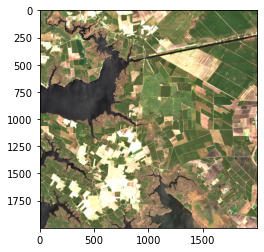

In [12]:
plt.imshow(bands[6000:9000,6000:9000,:])

# Saving Image

In [20]:
bands_clipped = bands[6000:9000,6000:9000,:]
img_paths = r'D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\ResNet50\Validation\image_2nd_dataset\place1.png'
tf.keras.preprocessing.image.save_img(img_paths, bands_clipped, data_format=None, file_format=None, scale=True)

In [18]:
true_color = rasterio.open(r'D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\ResNet50\Validation\image_2nd_dataset\place1_rbg_tif.tif','w',driver = 'Gtiff', width = bands_RGB.width, height = bands_RGB.height,
                          count = 3, crs=bands_RGB.crs, transform = bands_RGB.transform, dtype='float64')
true_color.write(new_band2,3) # Blue
true_color.write(new_band3,2) # Green
true_color.write(new_band4,1) # Red
true_color.close()

# Looking a way to padding the image to improve the validation results

In [30]:
a = rasterio.open(tif).read((1,2,3))
test_img = a[:,0:1000,0:1000]
test_img.shape

(3, 1000, 1000)

In [41]:
test_img[1,:,:]

array([[1022, 1076, 1082, ...,  463,  422,  440],
       [1008, 1066, 1072, ...,  450,  379,  370],
       [ 993, 1076, 1013, ...,  449,  368,  417],
       ...,
       [ 583,  477,  582, ..., 1964, 1960, 1954],
       [ 565,  588,  571, ..., 2094, 2018, 1980],
       [ 538,  539,  480, ..., 2172, 2042, 2002]], dtype=uint16)

In [31]:
# Pad the image
test_img_pad = np.pad(test_img, ((0, 0), (32, 32), (32, 32)), mode="empty")
test_img_pad.shape

(3, 1064, 1064)

In [42]:
b = np.zeros((test_img.shape[1],test_img.shape[2],3))
b[:,:,0] = test_img[0,:,:]/1000.0
b[:,:,1] = test_img[1,:,:]/1000.0
b[:,:,2] = test_img[2,:,:]/1000.0

In [43]:
b.shape

(1000, 1000, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


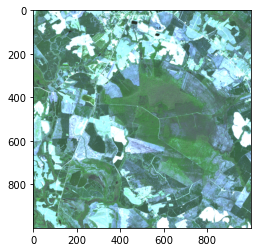

In [44]:
plt.imshow(b)